In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import respy

# Single Phase Linear Solver

**1. Input Data**

Grid Properties:

In [4]:
xdelta = np.array([750,1000,1250])
ydelta = np.array([750,1000,1250])
zdelta = 20

Reservoir Rock Properties:

In [5]:
xperm = np.array([50,100,200,100,150,250,150,200,300])
yperm = xperm/2
zperm = xperm/10

In [6]:
poro = np.array([0.15,0.18,0.20,0.17,0.20,0.22,0.22,0.25,0.26])

Fluid Properties

In [7]:
visc = 5

**2. Gridding**

In [8]:
delta = respy.GridDelta(xdelta,ydelta,20)

In [9]:
delta.xdelta

array([ 750., 1000., 1250.])

In [10]:
delta.ydelta

array([ 750., 1000., 1250.])

In [11]:
delta.depths

array([1000.])

In [12]:
delta.dims

2

In [13]:
delta.grids.dims

2

In [14]:
delta.grids.volume

array([11250010.60135316, 15000014.13513754, 18750017.66892192,
       15000014.13513754, 20000018.84685005, 25000023.55856256,
       18750017.66892192, 25000023.55856256, 31250029.4482032 ])

In [15]:
delta.index

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
delta.table

array([[0, 1, 0, 3],
       [0, 2, 1, 4],
       [1, 2, 2, 5],
       [3, 4, 0, 6],
       [3, 5, 1, 7],
       [4, 5, 2, 8],
       [6, 7, 3, 6],
       [6, 8, 4, 7],
       [7, 8, 5, 8]])

**3. Property Calculation**

In [17]:
rock = respy.RRock(xperm,yperm=yperm,zperm=zperm,poro=poro)

In [18]:
rock.xperm

array([ 50., 100., 200., 100., 150., 250., 150., 200., 300.])

In [19]:
rock.yperm

array([ 25.,  50., 100.,  50.,  75., 125.,  75., 100., 150.])

In [20]:
rock.poro

array([0.15, 0.18, 0.2 , 0.17, 0.2 , 0.22, 0.22, 0.25, 0.26])

In [21]:
oil = respy.Fluid(visc=5)

In [22]:
oil.visc

5.0

**4. Configuration**

In [23]:
time = respy.Time((1,)*5)

In [24]:
time.total

np.float64(5.0)

In [25]:
time.steps

array([1., 1., 1., 1., 1.])

In [26]:
time.nums

5

In [27]:
for index,current,step in time:
    print(index,current,step)

0 0.0 86400.0
1 86400.0 86400.0
2 172800.0 86400.0
3 259200.0 86400.0
4 345600.0 86400.0


In [28]:
w1 = respy.Well((0,),axis='z',radius=0.25,skin=2)
w2 = respy.Well((7,8),axis='x',radius=0.25,skin=0)

In [29]:
w2.block

(7, 8)

**5. Simulation**

In [30]:
cube = respy.simulation.Cuboid(delta.grids,rock,oil,tcomp=1e-5)

In [49]:
cube.depths

array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.])

In [31]:
cube.xflow

array([1000.        , 1500.        , 2400.        , 2666.66666667,
       3000.        , 4000.        , 5000.        , 5000.        ,
       6000.        ])

In [32]:
cube.rrock.xperm

array([ 50., 100., 200., 100., 150., 250., 150., 200., 300.])

In [33]:
cube.xflow

array([1000.        , 1500.        , 2400.        , 2666.66666667,
       3000.        , 4000.        , 5000.        , 5000.        ,
       6000.        ])

In [34]:
cube(tcomp=5e-5)

In [35]:
cube.xflow

array([1000.        , 1500.        , 2400.        , 2666.66666667,
       3000.        , 4000.        , 5000.        , 5000.        ,
       6000.        ])

In [36]:
rock2 = respy.RRock(xperm*2,yperm=yperm,zperm=zperm,poro=poro)

In [37]:
cube(rrock=rock2)

In [38]:
cube.xflow

array([ 2000.        ,  3000.        ,  4800.        ,  5333.33333333,
        6000.        ,  8000.        , 10000.        , 10000.        ,
       12000.        ])

In [39]:
cube.tcomp

5e-05

In [40]:
oil2 = respy.Fluid(visc=10)

In [41]:
cube(fluid=oil2)

In [50]:
cube.fluid.visc

10.0

In [48]:
cube.power

array([433.34961975, 433.34961975, 433.34961975, 433.34961975,
       433.34961975, 433.34961975, 433.34961975, 433.34961975,
       433.34961975])

In [42]:
cube.tcomp

5e-05

In [49]:
block = Block(delta.grid,res,oil,w1,w2)
block.transmissibility()
block.accumulation(5)
block.productivity()

In [50]:
block.Tx

array([1.26565812, 1.89848718, 3.03757949, 3.37508832, 3.79697436,
       5.06263248, 6.32829061, 6.32829061, 7.59394873])

In [51]:
block.Ty

array([0.63282906, 1.68754416, 4.2188604 , 0.94924359, 1.89848718,
       3.95518163, 1.13909231, 2.02505299, 3.79697436])

In [52]:
block.Tz

array([ 177.98317328,  474.62179542, 1186.55448854,  474.62179542,
        949.24359084, 1977.59081424,  889.91586641, 1582.07265139,
       2966.38622136])

In [53]:
block.A

array([ 337500.0324    ,  540000.05184   ,  750000.072     ,
        510000.04896   ,  800000.0768    , 1100000.1056    ,
        825000.0792    , 1250000.12      , 1625000.15600001])

In [54]:
block.J

[array([0.66931877]), array([ 58.5849729 , 109.84682418])]

In [38]:
build = onephase.Build(block.grid.plat)

In [39]:
T = build.T(block.Tx,block.Ty,block.Tx); T

array([[ 2.27818462, -1.51878975,  0.        , -0.75939487,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-1.51878975,  5.64220082, -2.33659961,  0.        , -1.78681147,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -2.33659961,  6.41936774,  0.        ,  0.        ,
        -4.08276813,  0.        ,  0.        ,  0.        ],
       [-0.75939487,  0.        ,  0.        ,  5.36855627, -3.57362293,
         0.        , -1.03553846,  0.        ,  0.        ],
       [ 0.        , -1.78681147,  0.        , -3.57362293, 11.65956237,
        -4.33939927,  0.        , -1.9597287 ,  0.        ],
       [ 0.        ,  0.        , -4.08276813,  0.        , -4.33939927,
        12.29663104,  0.        ,  0.        , -3.87446364],
       [ 0.        ,  0.        ,  0.        , -1.03553846,  0.        ,
         0.        ,  7.36382907, -6.32829061,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -1

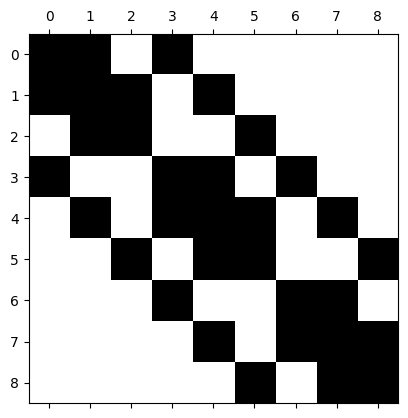

In [40]:
plt.spy(T); plt.show()

In [42]:
A = build.A(block.A); A

array([[ 337500.0324    ,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ],
       [      0.        ,  540000.05184   ,       0.        ,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,  750000.072     ,
              0.        ,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ,
         510000.04896   ,       0.        ,       0.        ,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ,
              0.        ,  800000.0768    ,       0.        ,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        ,
   

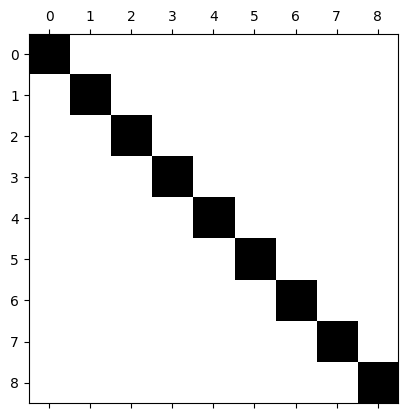

In [43]:
plt.spy(A); plt.show()

6. Post-Processing